# Exploratory Analysis with Linear Regressions
### World Happiness in 2019 
### Correlation Between Social Support and Happiness
#### Sean Hawkins|1/23/2021

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


In [197]:
happiness = pd.read_csv('world-happiness-report-2019.csv')
happiness.head()



,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\r\nper capita,Healthy life\r\nexpectancy
0,Finland,1,4,41,10,2,5,4.0,47,22.0,27.0
1,Denmark,2,13,24,26,4,6,3.0,22,14.0,23.0
2,Norway,3,8,16,29,3,3,8.0,11,7.0,12.0
3,Iceland,4,9,3,3,1,7,45.0,3,15.0,13.0
4,Netherlands,5,1,12,25,15,19,12.0,7,12.0,18.0


In [198]:
happiness.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\r\nper capita,Healthy life\r\nexpectancy
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,151.000000,149.000000
mean,78.819355,78.451613,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,77.000000,75.718121
std,45.146870,45.319815,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,43.734045,43.509409
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
25%,40.500000,39.500000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,39.500000,38.000000
50%,79.000000,78.000000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,77.000000,76.000000
75%,117.500000,117.500000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.500000,113.000000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [199]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country (region)          155 non-null    object 
 1   Ladder                    155 non-null    int64  
 2   SD of Ladder              155 non-null    int64  
 3   Positive affect           155 non-null    int64  
 4   Negative affect           155 non-null    int64  
 5   Social support            155 non-null    int64  
 6   Freedom                   155 non-null    int64  
 7   Corruption                148 non-null    float64
 8   Generosity                155 non-null    int64  
 9   Log of GDP
per capita    151 non-null    float64
 10  Healthy life
expectancy  149 non-null    float64
dtypes: float64(3), int64(7), object(1)
memory usage: 13.4+ KB


In [200]:
X = happiness['Social support'].values
y = happiness['Ladder'].values

In [201]:
X = X.reshape(-1, 1)
X

array([[  2],
       [  4],
       [  3],
       [  1],
       [ 15],
       [ 13],
       [ 25],
       [  5],
       [ 20],
       [ 31],
       [  7],
       [ 42],
       [ 38],
       [ 27],
       [  9],
       [  6],
       [ 39],
       [ 22],
       [ 37],
       [ 24],
       [ 72],
       [ 16],
       [ 67],
       [ 32],
       [ 48],
       [ 58],
       [ 78],
       [ 62],
       [ 26],
       [ 41],
       [ 43],
       [ 35],
       [ 36],
       [ 83],
       [ 23],
       [ 59],
       [ 21],
       [ 29],
       [ 44],
       [ 11],
       [ 17],
       [ 52],
       [ 14],
       [ 66],
       [ 85],
       [ 46],
       [ 86],
       [ 90],
       [ 71],
       [ 69],
       [ 53],
       [ 34],
       [ 91],
       [ 12],
       [ 28],
       [ 54],
       [ 50],
       [ 84],
       [ 19],
       [ 93],
       [ 51],
       [ 30],
       [ 81],
       [ 77],
       [ 47],
       [130],
       [ 40],
       [ 75],
       [ 57],
       [ 65],
       [ 73],
      

In [202]:
y = y.reshape(-1, 1)
y

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
      

In [205]:
# X feature = social support
# y feature = happiness level 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)


In [206]:
# Print out some data
print(f'X_Train shape [{x_train.shape}]')
print(f'X_Test shape [{x_test.shape}]')
print(f'y_Train shape [{y_train.shape}]')
print(f'y_Test shape [{y_test.shape}]')

X_Train shape [(124, 1)]
X_Test shape [(31, 1)]
y_Train shape [(124, 1)]
y_Test shape [(31, 1)]


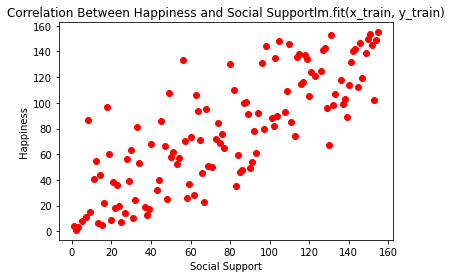

In [208]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('Social Support')
plt.ylabel('Happiness')
plt.title("Correlation Between Happiness and Social Support")
plt.show()



In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

In [ ]:
y_predict = lm.predict(x_test)

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_test, y_predict)
plt.xlabel('Social Support')
plt.ylabel('Training Model')
plt.plot

## Conclusions
1. There is a clear relationship between social support and overall happiness/life satisfaction (measured by Cantril Ladder) 
2. Looking at the plot, it is clear that social support alone cannot accurately predict overall happiness/life satisfaction.
3. Just as there are many data points that support this correlation, there are also many outliers. This supports the above notion that social support alone is not a definitive predictor of happiness/life satisfaction. 